## **Análise ARIMA e SARIMAX para tabela vendas**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instalação da biblioteca SARIMA

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00


Carregamento dos dados das estações será realizado individualmente, arquivo por arquivo. Primeiramente, vamos carregar as bibliotecas de análise de dados e realizar todo o pré-tratamento dos dados e a determinação do índice temporal para a série.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Case_VendasProdutos/Sample_Superstore.csv')
df['Sales'] = df['Sales'].str.replace(',', '.', regex=True)
df['Discount'] = df['Discount'].str.replace(',', '.', regex=True)
df['Profit'] = df['Profit'].str.replace(',', '.', regex=True)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0,219.582
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6,4,0,13.32


In [5]:
df.describe()

,Row ID,Postal Code,Quantity
count,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,3.789574
std,2885.163629,32063.693350,2.225110
min,1.000000,1040.000000,1.000000
25%,2499.250000,23223.000000,2.000000
50%,4997.500000,56430.500000,3.000000
75%,7495.750000,90008.000000,5.000000
max,9994.000000,99301.000000,14.000000


In [6]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
df = df[['Order Date', 'Sales']]

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-8-f5779b1b9e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [9]:
# Converta a coluna 'Sales' para o tipo numérico
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

<ipython-input-9-6f97bf6a1f4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')


In [10]:
df = df.set_index('Order Date')

In [11]:
df_monthly = df.resample('M').sum()


In [12]:
df_monthly['Sales']

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

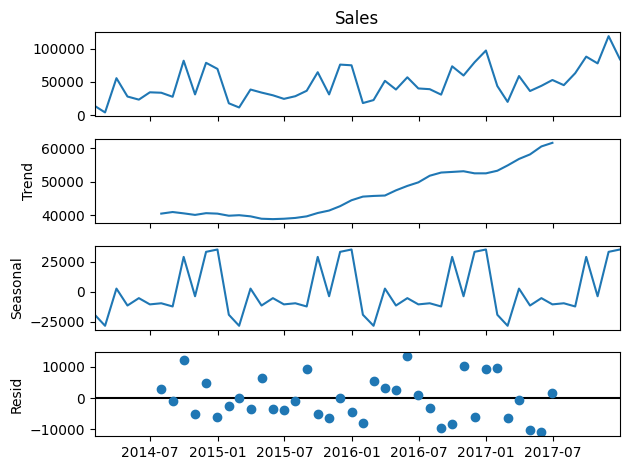

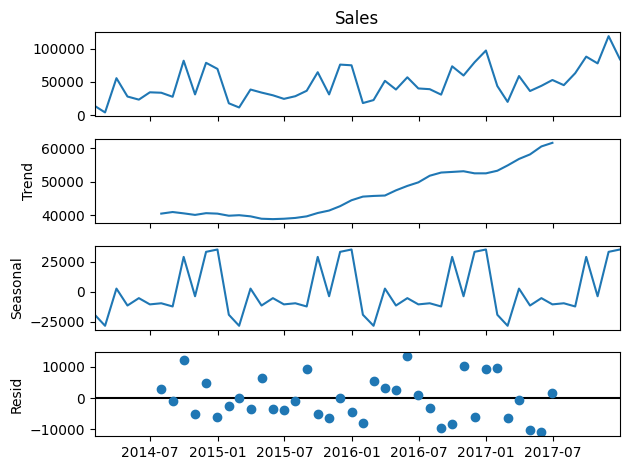

In [17]:
# Decomposição da série
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_monthly['Sales'])
decomp.plot()

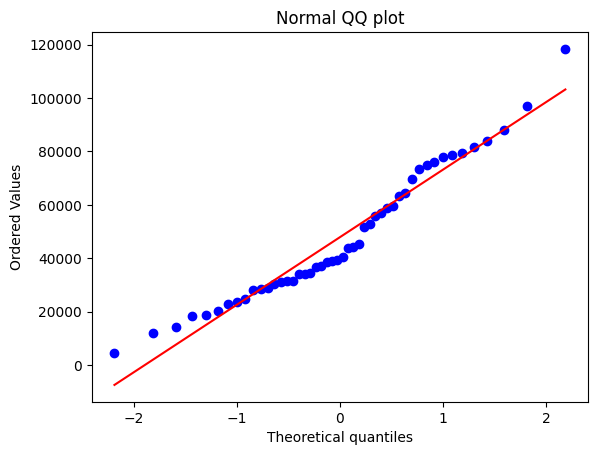

In [18]:
# Verificação da Normalidade e necessidade de transformação da série
import scipy.stats as stats

serie = df_monthly['Sales']

stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [19]:
"""
Teste Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05
"""
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9553079605102539
p-valor: 0.0652569904923439


In [20]:
# Transformação por raiz cúbica (quando possui dados com valor zero ou negativos)
serie3 = np.sign(serie)*abs(serie)**(1/3)
serie3

Order Date
2014-01-31    24.236604
2014-02-28    16.533927
2014-03-31    38.188127
2014-04-30    30.472283
2014-05-31    28.703392
2014-06-30    32.584044
2014-07-31    32.379083
2014-08-31    30.333127
2014-09-30    43.405458
2014-10-31    31.566214
2014-11-30    42.841079
2014-12-31    41.123487
2015-01-31    26.291626
2015-02-28    22.863343
2015-03-31    33.832583
2015-04-30    32.458000
2015-05-31    31.117723
2015-06-30    29.160933
2015-07-31    30.640071
2015-08-31    33.291670
2015-09-30    40.123766
2015-10-31    31.549992
2015-11-30    42.353138
2015-12-31    42.156544
2016-01-31    26.468095
2016-02-29    28.429936
2016-03-31    37.257007
2016-04-30    33.839509
2016-05-31    38.482249
2016-06-30    34.297429
2016-07-31    33.987874
2016-08-31    31.452730
2016-09-30    41.871494
2016-10-31    39.080645
2016-11-30    42.982861
2016-12-31    45.946858
2017-01-31    35.295826
2017-02-28    27.279732
2017-03-31    38.901869
2017-04-30    33.177960
2017-05-31    35.373180
2017-

In [21]:
e, p = stats.shapiro(serie3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9834187626838684
p-valor: 0.7248749732971191


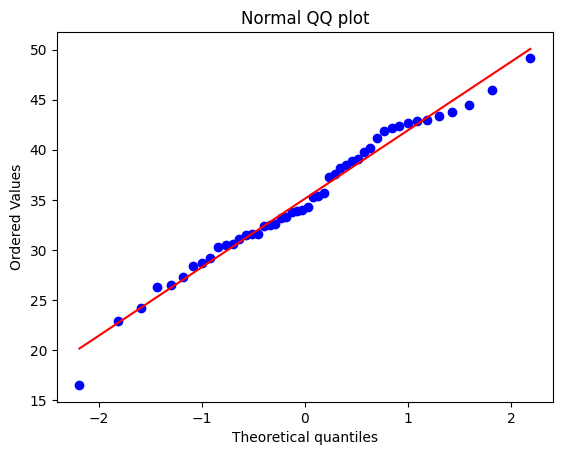

In [22]:
stats.probplot(serie3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

<ipython-input-23-1bc7ba1c5a71>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie);


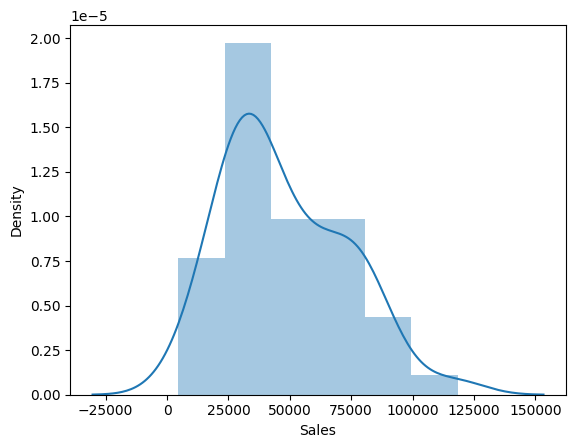

In [23]:
# Distribuição da série sem transformação cubica
import seaborn as sns
sns.distplot(serie);

<ipython-input-24-c6d8987012eb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie3);


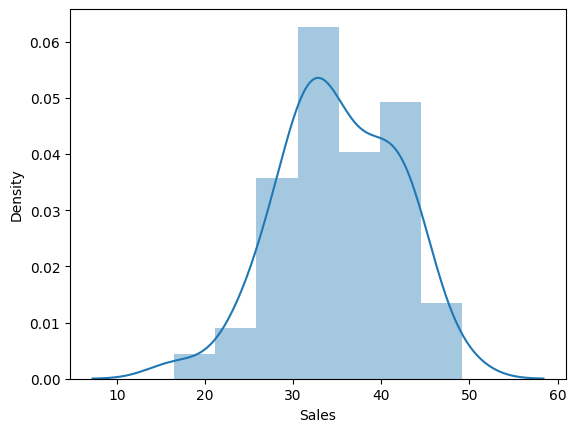

In [24]:
# Transformação da série com a Transformação cúbica
import seaborn as sns
sns.distplot(serie3);

### **Teste de Estacionaridade**

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário: estatística do teste < valor crítico

In [25]:
import statsmodels.tsa.stattools

kpss = statsmodels.tsa.stattools.kpss(serie3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.8139
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


<ipython-input-25-1b04ad243185>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie3)


<ipython-input-26-bc034375f762>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie5);


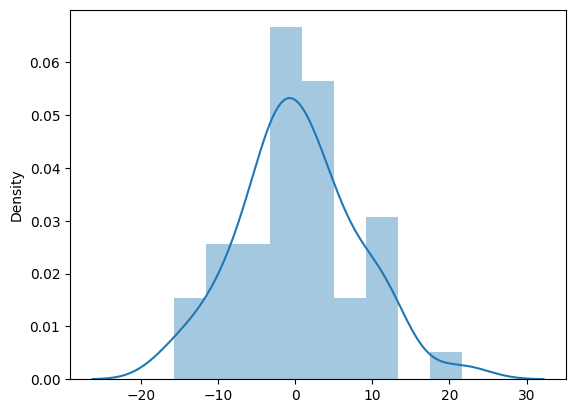

In [26]:
# Caso não fosse estacionária poderia tentar fazer a diferenciação:
serie5 = np.diff(serie3)
import seaborn as sns
sns.distplot(serie5);

In [27]:
kpss = statsmodels.tsa.stattools.kpss(serie5)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.2070
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


<ipython-input-27-24be7699d548>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie5)


### **Autocorrelação**

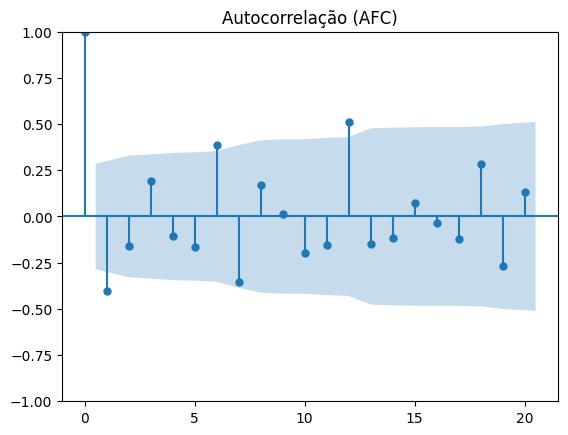

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(serie5, lags=20)
plt.title('Autocorrelação (AFC)')
plt.show()

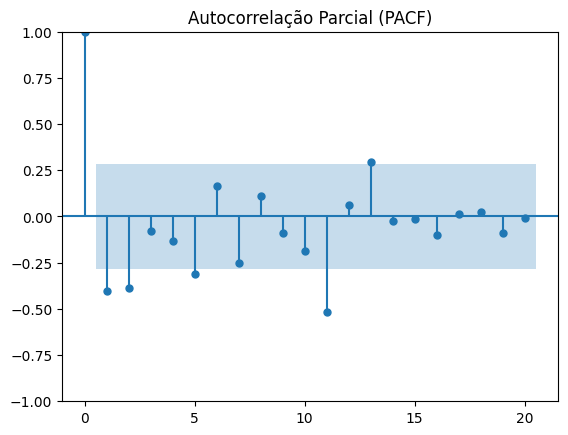

In [29]:
plot_pacf(serie5, lags=20)
plt.title('Autocorrelação Parcial (PACF)')
plt.show()

In [30]:
### AUTOARIMA
modelo_auto = auto_arima(serie5, trace = True, stepwise = False, seasonal=True, max_p=10, max_q=10,
                          max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0, m=12,)

# Trace: apresenta no console a lista dos modelos.
# stepwise: seleção gradual(processo mais rápido, porém menos minucioso).
# m: período sazonal (neste caso mensal).
# Interessante dobrar as ordens máximas: max.p = 10, max.q = 10, max.P = 4, max.Q = 4

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=326.808, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=308.797, Time=0.19 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=inf, Time=2.55 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=297.908, Time=0.11 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=296.641, Time=0.19 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=299.920, Ti

In [31]:
print(modelo_auto.aic())

271.2466945387453


In [32]:
resultado_auto = modelo_auto.fit(serie5)
print(resultado_auto.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   47
Model:             SARIMAX(0, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -128.623
Date:                              Sat, 27 Jan 2024   AIC                            271.247
Time:                                      00:49:00   BIC                            284.198
Sample:                                           0   HQIC                           276.120
                                               - 47                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.011      0.143      0.886      -0.020       0.023
ma.L1         -0.95

In [33]:
residuos_auto = resultado_auto.resid
residuos_auto()

array([-7.87588056e+00,  1.80203695e+01,  2.12803391e+00,  1.81502520e+00,
        4.30987537e+00,  3.10086925e+00,  6.87002948e-01,  1.35217459e+01,
       -6.53034706e-01,  1.17425031e+01,  6.56335698e+00, -1.31038305e+00,
        1.39177334e+00, -5.39704536e+00, -1.05782233e-01, -8.35144287e-01,
       -5.43374073e+00, -3.66457336e+00,  1.73354358e-01, -3.45916848e+00,
       -2.10223145e+00, -7.05789805e-01,  3.00812777e-01, -2.65110624e+00,
        4.33997165e+00, -1.63236105e+00, -3.32373313e-01,  5.09924782e+00,
        9.33494919e-03, -2.68726512e-01, -3.60587440e+00, -1.76060908e+00,
        4.06759230e+00, -1.87975414e+00,  2.42079692e+00,  4.76570717e+00,
       -6.29021477e-01, -8.56938739e-01, -3.33586009e+00, -1.74257421e+00,
        1.14647032e+00, -1.04730428e+00,  4.10255874e+00, -9.13148261e-01,
        4.69731814e+00,  2.73828802e+00, -2.69486560e+00])

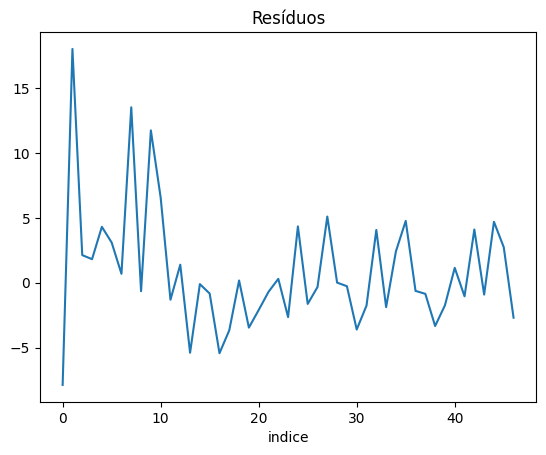

In [34]:
plt.plot(residuos_auto())
plt.title('Resíduos')
plt.xlabel('indice')
plt.show()

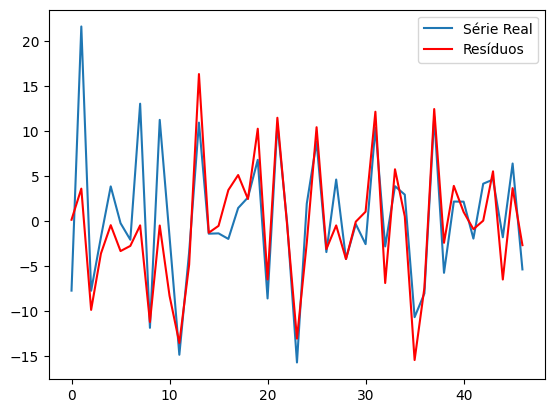

In [35]:
plt.plot(serie5, label='Série Real')
plt.plot(serie5-residuos_auto(),color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

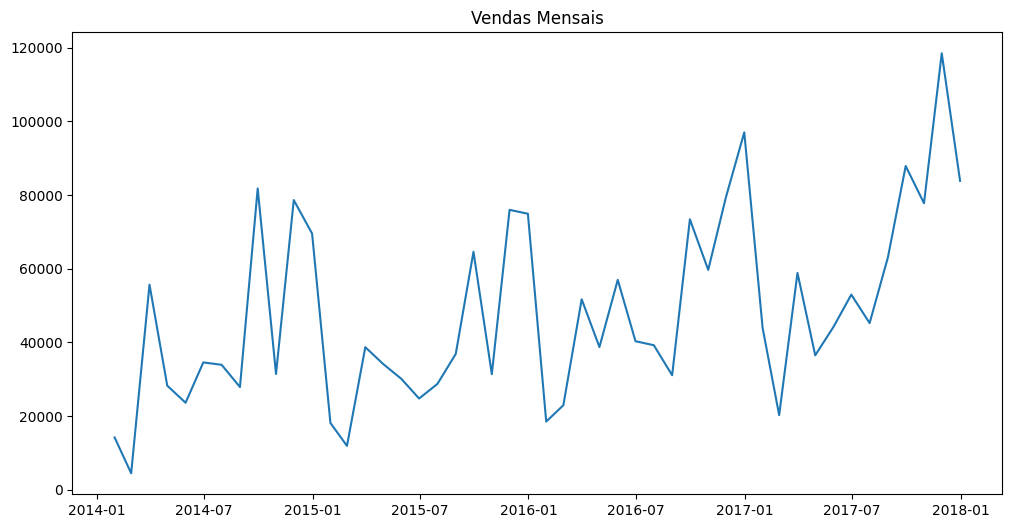

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1098.402, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1091.142, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1086.023, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1096.548, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1087.981, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1088.734, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1088.580, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1084.612, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1085.789, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1085.792, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1089.631, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1087.425, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.625 seconds


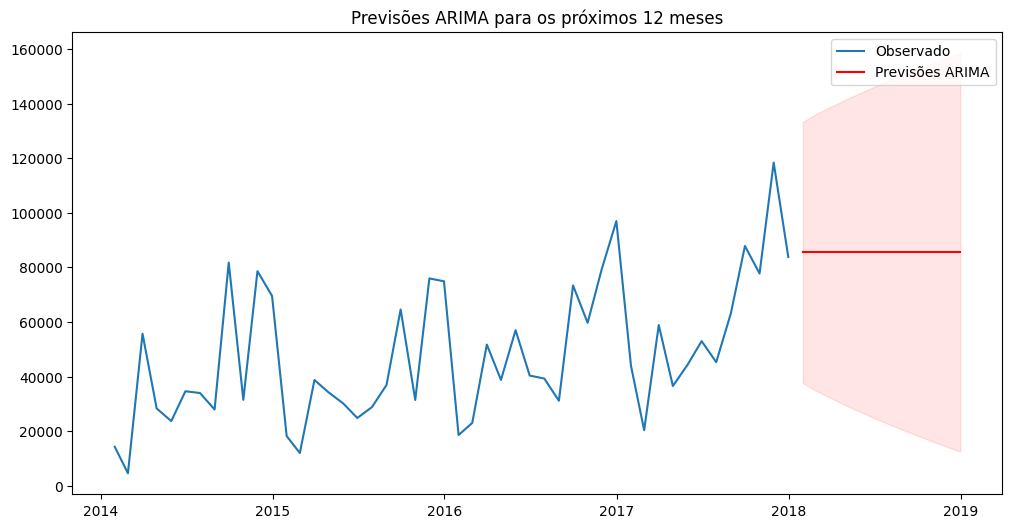

In [40]:
# Exiba o gráfico de séries temporais
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Sales'])
plt.title('Vendas Mensais')
plt.show()

# Verifique se há valores ausentes
if df_monthly['Sales'].isnull().any():
    print("Existem valores ausentes na coluna 'Sales'. Trate-os antes de prosseguir.")
else:
    # Ajuste do modelo ARIMA
    model_arima = auto_arima(df_monthly['Sales'], trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
    arima_order = model_arima.order

    # Ajuste o modelo ARIMA com os parâmetros encontrados
    model = ARIMA(df_monthly['Sales'], order=arima_order)
    fit_arima = model.fit()

    # Faça previsões para os próximos 12 meses
    forecast_arima = fit_arima.get_forecast(steps=12)
    forecast_arima_ci = forecast_arima.conf_int()

    # Exiba o gráfico das previsões
    plt.figure(figsize=(12, 6))
    plt.plot(df_monthly['Sales'], label='Observado')
    plt.plot(forecast_arima.predicted_mean, color='red', label='Previsões ARIMA')
    plt.fill_between(forecast_arima_ci.index, forecast_arima_ci.iloc[:, 0], forecast_arima_ci.iloc[:, 1], color='r', alpha=0.1)
    plt.title('Previsões ARIMA para os próximos 12 meses')
    plt.legend()
    plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1079.882, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1098.402, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1077.114, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1078.127, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1096.548, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1091.142, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.911, Time=0.31 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1079.082, Time=0.18 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1081.816, Time=0.09 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1080.489, Time=0.38 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.759, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.411, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.909, Time=0.04 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.137, Time=0.26 sec
 ARIMA(2,1,0)(1,0,1

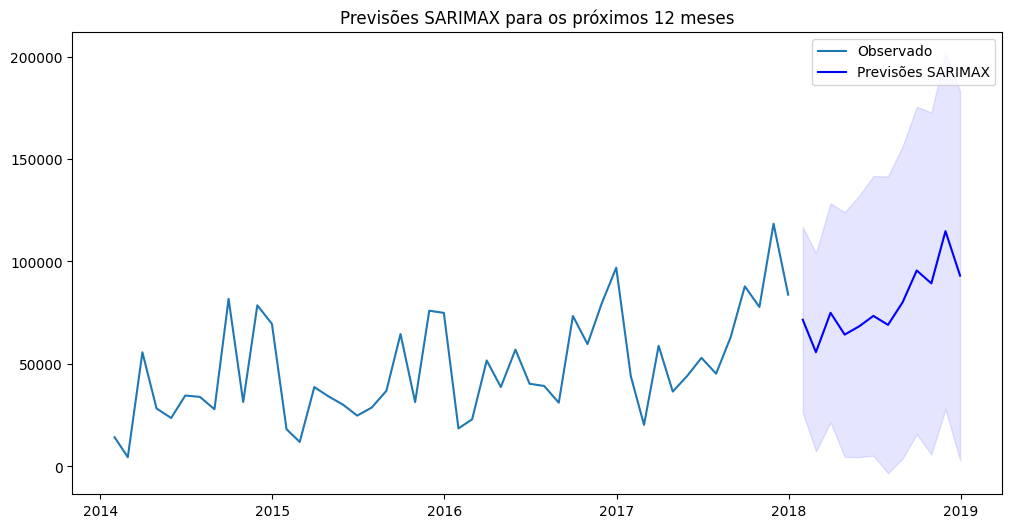

In [41]:
# Verifique se há valores ausentes
if df_monthly['Sales'].isnull().any():
    print("Existem valores ausentes na coluna 'Sales'. Trate-os antes de prosseguir.")
else:
    # Ajuste do modelo SARIMAX
    model_sarimax = auto_arima(df_monthly['Sales'], trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12)
    sarimax_order = model_sarimax.order
    sarimax_seasonal_order = model_sarimax.seasonal_order

    # Ajuste o modelo SARIMAX com os parâmetros encontrados
    model = SARIMAX(df_monthly['Sales'], order=sarimax_order, seasonal_order=sarimax_seasonal_order)
    fit_sarimax = model.fit()

    # Faça previsões para os próximos 12 meses
    forecast_sarimax = fit_sarimax.get_forecast(steps=12)
    forecast_sarimax_ci = forecast_sarimax.conf_int()

    # Exiba o gráfico das previsões
    plt.figure(figsize=(12, 6))
    plt.plot(df_monthly['Sales'], label='Observado')
    plt.plot(forecast_sarimax.predicted_mean, color='blue', label='Previsões SARIMAX')
    plt.fill_between(forecast_sarimax_ci.index, forecast_sarimax_ci.iloc[:, 0], forecast_sarimax_ci.iloc[:, 1], color='b', alpha=0.1)
    plt.title('Previsões SARIMAX para os próximos 12 meses')
    plt.legend()
    plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Para o modelo ARIMA
# Calcula as previsões ARIMA
predictions_arima = fit_arima.get_forecast(steps=12).predicted_mean

# Calcula as métricas para o modelo ARIMA
mae_arima = mean_absolute_error(df_monthly['Sales'][-12:], predictions_arima)
mse_arima = mean_squared_error(df_monthly['Sales'][-12:], predictions_arima)
rmse_arima = np.sqrt(mse_arima)

print(f'MAE (ARIMA): {mae_arima:.2f}')
print(f'MSE (ARIMA): {mse_arima:.2f}')
print(f'RMSE (ARIMA): {rmse_arima:.2f}')

# Para o modelo SARIMAX
# Calcula as previsões SARIMAX
predictions_sarimax = fit_sarimax.get_forecast(steps=12).predicted_mean

# Calcula as métricas para o modelo SARIMAX
mae_sarimax = mean_absolute_error(df_monthly['Sales'][-12:], predictions_sarimax)
mse_sarimax = mean_squared_error(df_monthly['Sales'][-12:], predictions_sarimax)
rmse_sarimax = np.sqrt(mse_sarimax)

print(f'MAE (SARIMAX): {mae_sarimax:.2f}')
print(f'MSE (SARIMAX): {mse_sarimax:.2f}')
print(f'RMSE (SARIMAX): {rmse_sarimax:.2f}')


MAE (ARIMA): 30286.92
MSE (ARIMA): 1259749652.47
RMSE (ARIMA): 35492.95
MAE (SARIMAX): 18710.17
MSE (SARIMAX): 433224867.64
RMSE (SARIMAX): 20814.05


**ERRO MÉDIO ABSOLUTO (MAE)**



**ERRO QUADRÁTICO MÉDIO (MSE)**

**RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)**

#**Valores previstos pelos respectivos modelos**

In [43]:
# Para o modelo ARIMA
forecast_values_arima = forecast_arima.predicted_mean
print("Previsões ARIMA para os próximos 12 meses:")
print(forecast_values_arima)

# Para o modelo SARIMAX
forecast_values_sarimax = forecast_sarimax.predicted_mean
print("\nPrevisões SARIMAX para os próximos 12 meses:")
print(forecast_values_sarimax)


Previsões ARIMA para os próximos 12 meses:
2018-01-31    85503.666157
2018-02-28    85503.666157
2018-03-31    85503.666157
2018-04-30    85503.666157
2018-05-31    85503.666157
2018-06-30    85503.666157
2018-07-31    85503.666157
2018-08-31    85503.666157
2018-09-30    85503.666157
2018-10-31    85503.666157
2018-11-30    85503.666157
2018-12-31    85503.666157
Freq: M, Name: predicted_mean, dtype: float64

Previsões SARIMAX para os próximos 12 meses:
2018-01-31     71581.934002
2018-02-28     55743.042720
2018-03-31     74972.678142
2018-04-30     64319.174228
2018-05-31     68388.262627
2018-06-30     73453.160526
2018-07-31     69074.279370
2018-08-31     80090.015508
2018-09-30     95596.164414
2018-10-31     89323.705561
2018-11-30    114793.335893
2018-12-31     93092.603555
Freq: M, Name: predicted_mean, dtype: float64
